<a href="https://colab.research.google.com/github/VaishnaviKrishnaHari/CodewayProjects/blob/main/CWAY_MOVIE_GENRE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("train_data.txt", sep=":::", engine="python", header=None)

In [ ]:
data.columns = ["Number", "MovieName", "Genre", "Summary"]

In [ ]:
print("Number of samples:", len(data))
print("Number of unique genres:", data["Genre"].nunique())
print("\nGenres distribution:")
print(data["Genre"].value_counts())

Number of samples: 54214
Number of unique genres: 27

Genres distribution:
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64


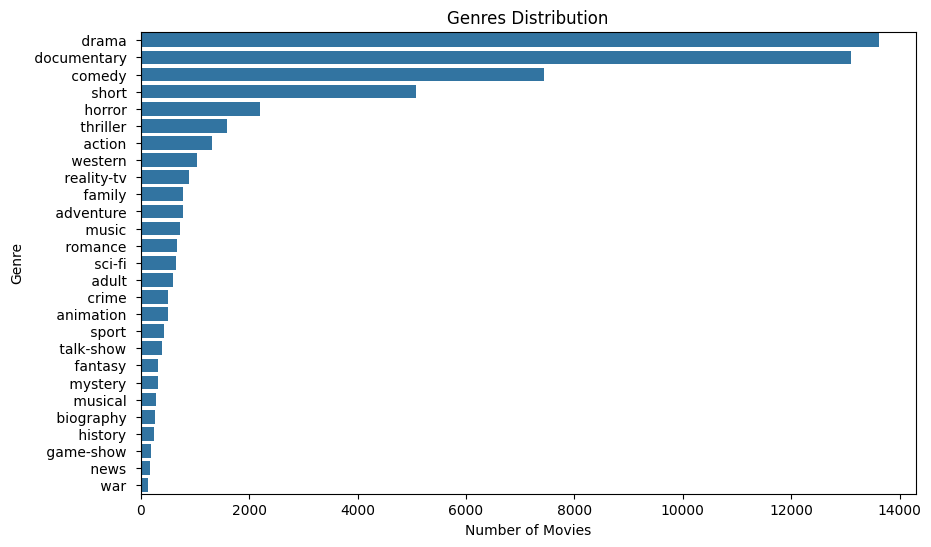

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y="Genre", data=data, order=data["Genre"].value_counts().index)
plt.title("Genres Distribution")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
all_summaries = " ".join(data["Summary"])

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_summaries)

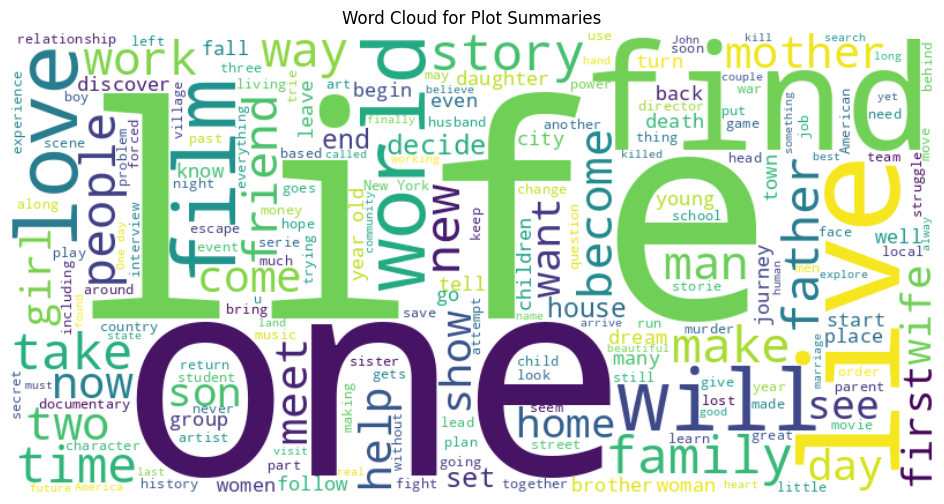

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud for Plot Summaries")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data["Summary"] = data["Summary"].str.lower()

In [ ]:
X = data["Summary"]
y = data["Genre"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
nb_predictions = nb_classifier.predict(X_test_tfidf)
lr_predictions = lr_classifier.predict(X_test_tfidf)
svm_predictions = svm_classifier.predict(X_test_tfidf)

In [ ]:
nb_accuracy = accuracy_score(y_test, nb_predictions)

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [ ]:
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.4464631559531495
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.73      0.05      0.09      1443
       crime        0.00      0.00      0.00       107
 documentary        0.53      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.5812966891081804


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.56      0.20      0.30       263
       adult        0.87      0.18      0.30       112
   adventure        0.47      0.10      0.17       139
   animation        0.75      0.03      0.06       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.59      0.56      1443
       crime        0.33      0.01      0.02       107
 documentary        0.65      0.86      0.74      2659
       drama        0.53      0.81      0.64      2697
      family        0.47      0.05      0.10       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.92      0.30      0.45        40
     history        0.00      0.00      0.00        45
      horror        0.68      0.57      0.62       431
       music        0.69      0.39      0.50       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Support Vector Machine Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_predictions))

Support Vector Machine Accuracy: 0.5973439085124043


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.53      0.35      0.42       263
       adult        0.74      0.40      0.52       112
   adventure        0.52      0.20      0.29       139
   animation        0.61      0.13      0.22       104
   biography        0.00      0.00      0.00        61
      comedy        0.54      0.61      0.57      1443
       crime        0.17      0.02      0.03       107
 documentary        0.68      0.84      0.75      2659
       drama        0.55      0.78      0.64      2697
      family        0.46      0.11      0.17       150
     fantasy        0.50      0.03      0.05        74
   game-show        0.92      0.55      0.69        40
     history        0.00      0.00      0.00        45
      horror        0.68      0.66      0.67       431
       music        0.62      0.51      0.56       144
     musical        0.50      0.04      0.07        50
     mystery        1.00      0.02      0.04        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_data = pd.read_csv("test_data.txt", sep=":::", engine="python", header=None)

In [ ]:
test_data.columns = ["Number", "MovieName", "Summary"]

In [ ]:
test_data["Summary"] = test_data["Summary"].str.lower()

In [ ]:
X_new_tfidf = tfidf_vectorizer.transform(test_data["Summary"])

In [ ]:
new_predictions_nb = nb_classifier.predict(X_new_tfidf)
new_predictions_lr = lr_classifier.predict(X_new_tfidf)
new_predictions_svm = svm_classifier.predict(X_new_tfidf)

In [ ]:
test_data["PredictedGenreNB"] = new_predictions_nb
test_data["PredictedGenreLR"] = new_predictions_lr
test_data["PredictedGenreSVM"] = new_predictions_svm

In [ ]:
test_data_solution = pd.read_csv("test_data_solution.txt", sep=":::", engine="python", header=None)

In [ ]:
test_data_solution.columns = ["Number", "MovieName", "ActualGenre", "Summary"]

In [ ]:
new_labels = test_data_solution["ActualGenre"]

In [ ]:
new_accuracy_nb = accuracy_score(new_labels, new_predictions_nb)

In [ ]:
new_accuracy_lr = accuracy_score(new_labels, new_predictions_lr)

In [ ]:
new_accuracy_svm = accuracy_score(new_labels, new_predictions_svm)

In [ ]:
print("Accuracy using Naive Bayes: ",new_accuracy_nb)

Accuracy using Naive Bayes:  0.4438929889298893


In [ ]:
print("Accuracy using Logistic Regression: ",new_accuracy_lr)

Accuracy using Logistic Regression:  0.5795940959409595


In [ ]:
print("Accuracy using Support Vector Machine: ",new_accuracy_svm)

Accuracy using Support Vector Machine:  0.5951476014760148
